# Lecture 6: Stochastic Processes

# Random numbers

In [38]:
# Packages we need
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

### Uniform random numbers

In [5]:
# uniform random numbers on [0,1]
uniforms = npr.rand(10)
uniforms

array([0.08885219, 0.40331947, 0.53465704, 0.16384621, 0.64773297,
       0.20415558, 0.98267279, 0.97730239, 0.9926693 , 0.55035572])

In [6]:
# matrix of uniform random numbers
uniform_mat = npr.rand(2,2)
uniform_mat

array([[0.29597134, 0.11169098],
       [0.06199958, 0.56239657]])

In [9]:
# transformation from [0,1] to [a,b]
a=2
b=10
uniform_a_b = a + (b-a)*npr.rand(10)
uniform_a_b

array([6.20441188, 3.28014032, 9.51294668, 3.39378416, 2.17691554,
       9.65743433, 5.17556597, 3.47813631, 8.72924571, 2.19917997])

### Other distributions

In [10]:
normals = npr.randn(10) # normal distribution
normals

array([ 0.22638057,  2.16652531, -1.29233733,  1.39192835, -1.5186343 ,
       -1.33405017,  0.71829503,  1.03316724,  0.88197033,  1.76121794])

In [11]:
integers=npr.randint(2,6,5) # random integers (min,max,size)
integers

array([5, 4, 5, 5, 3])

In [26]:
choice=npr.choice(range(0,6), size=10, replace=True) # random sampling
choice

array([3, 1, 0, 3, 4, 2, 3, 2, 2, 2])

### Application 1: Standard normals

Draw from the standard normal distribution eight samples. The first sample has one observation, the second 10 observations, the third $10^2$ observations, the eighth one, $10^7$. Plot the means and standard deviation of each sample against the sample decade (log-10 scale).What do you observe? How do you interpret the observation?

Text(0,0.5,'Sample mean')

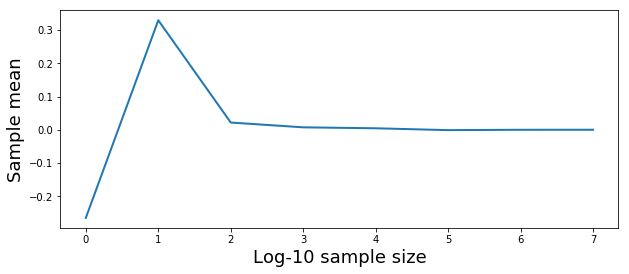

In [41]:
sample_sizes = [10**x for x in range(8)] # from 1 to 10 Mio observations
means=np.zeros(8)
stds=np.zeros(8)

for i, sample_size in enumerate(sample_sizes):
    random_sample = npr.randn(sample_size)
    means[i] = random_sample.mean()
    stds[i] = random_sample.std()

plt.figure(figsize=(10,4))    
plt.plot(means,lw=2)
plt.xlabel("Log-10 sample size",fontsize=18)
plt.ylabel("Sample mean",fontsize=18)

### Application 2: Sampling from a population

There are nine students in a class. One of them is 23, two are 24,three are 25, one is 26, and two are 27. Draw a 10,000-large sample from their age distribution. Plot a histogram of the empirical frequencies. What do you expect the height of the third column tobe relative to the fifth?

Text(0,0.5,'Frequency')

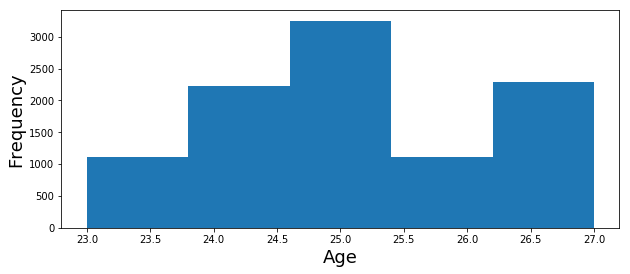

In [42]:
ages=[23,24,24,25,25,25,26,27,27]
age_sample=npr.choice(ages, 10000)
plt.figure(figsize=(10,4)) 
plt.hist(age_sample, bins=5)
plt.xlabel("Age", fontsize=18)
plt.ylabel("Frequency", fontsize=18)

### Application 1.3: How to draw from arbitrary distributions?

We draw 10000 random numbers from a distribution with c.d.f
$$ F\left(x\right)=\frac{1}{1+\exp\left(-x\right)} $$

In [43]:
y=npr.rand(10000) # simulate uniforms (i.e., quantiles)
x=-np.log(1.0/y-1) # invert the c.d.f. and evaluate over quantiles

## Simulation

### Black-Scholes stock prices

Let us simulate 100,000 possible stock prices in two-years time. The current stock price is 100. The risk-free rate is 5% per annum, and the annualised volatility is 25%. 

1. Plot a histogram of the simulated stock prices. What distribution do they resemble?
2. What is the mean and variance of the simulated stock prices?
3. What happens with the mean and variance if we look at a three-years window?

Text(0.5,0,'Stock price')

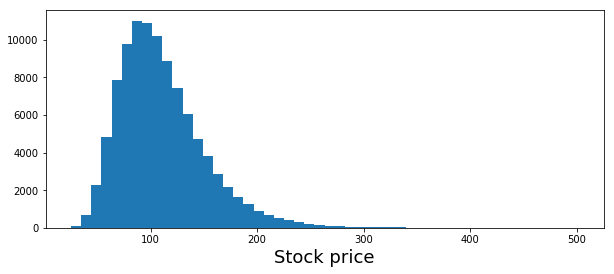

In [53]:
S0 = 100
r = 0.05
sigma = 0.25
T = 2
I = 10**5
ST1 = S0*np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*npr.randn(I))

plt.figure(figsize=(10,4))
plt.hist(ST1, bins=50)
plt.xlabel("Stock price", fontsize=18)

In [54]:
mprice=ST1.mean()
sprice=ST1.std()
(mprice,sprice)

(110.43476893932903, 40.221088460784095)

## Stochastic processes

## Black-Scholes stock prices paths

Let us simulate 100,000 possible stock paths in two-years time, using 25 steps per year. The current stock price is 100. The risk-free rate is 5% per annum, and the annualised volatility is 25%. 

1. Plot the first and the last path of the stock price.
2. How would the path look if the risk-free rate is 2%? or the volatility 50%?

Text(0,0.5,'Price')

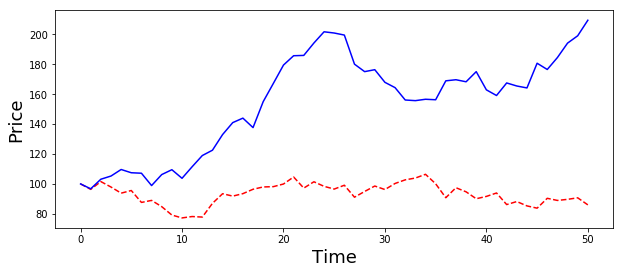

In [57]:
I = 10**5
M = 50
dt = T/M
S = np.zeros((M+1,I))
S[0] = S0
for t in range(1,M+1):
    S[t] = S[t-1]*np.exp((r-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*npr.randn(I))

plt.figure(figsize=(10,4))
plt.plot(S[:,0], ls='--', c='r')
plt.plot(S[:,I-1], c='b')
plt.xlabel("Time", fontsize=18)
plt.ylabel("Price", fontsize=18)


### Cox-Ingersoll-Ross model

Consider the following mean-reverting dynamic for the interest rate $x_t$:

$$ dx_t=\kappa\left(\theta-x_t\right) \times dt+ \sigma \sqrt{x_t} \times dZ_t$$

The parameters: $\kappa$ is the speed of mean-reversion, $\theta$ is the long-run mean, $\sigma$ is the volatility parameter.


1. The discrete solution to the stochastic differential equation is a little bit more involved. 
2. One nice property of this model is that the value of $x$ always remains positive (e.g., the case of interest rates).
3. In the discrete time version, this may not hold always -- so we need to adjust!

** Discretization **

Let $s=t-\Delta t$ and $x^+=\max\left(x,0\right)$. 

\begin{align*}
\tilde{x}_t&=\tilde{x}_{t-\Delta}+\kappa\left(\theta-\tilde{x}^+_{t-\Delta}\right)\Delta t+\sigma \sqrt{\tilde{x}^+_{t-\Delta}} \sqrt{\Delta t} z_t \\
x_t&=\tilde{x}^+_{t}
\end{align*}

** Application **
Let us simulate 100,000 possible interest paths in two-years time, using 25 steps per year. The current interest rate is 5%.

The other parameters are: $\kappa=3$, $\theta=0.02$, $\sigma=0.1$.

Text(0,0.5,'Interest rate')

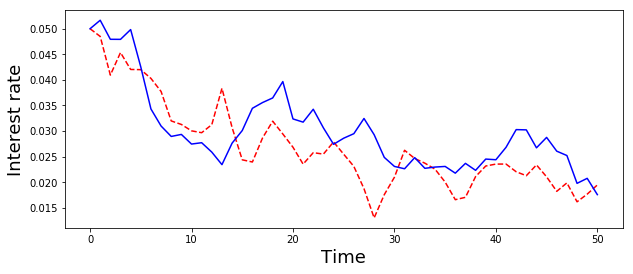

In [60]:
x0 = 0.05
kappa = 3.
theta = 0.02
sigma = 0.1

xh = np.zeros((M+1,I))
x1 = np.zeros_like(xh)

xh[0] = x0
x1[0] = x0

for t in range(1,M+1):
    xh[t] = xh[t-1] + kappa*(theta-np.maximum(xh[t-1],0))*dt + sigma*np.sqrt(np.maximum(xh[t-1],0))*np.sqrt(dt)*npr.randn(I)
    x1 = np.maximum(xh,0)

plt.figure(figsize=(10,4))
plt.plot(x1[:,0], ls='--', c='r')
plt.plot(x1[:,I-1], c='b')
plt.xlabel("Time", fontsize=18)
plt.ylabel("Interest rate", fontsize=18)

### Heston stochastic volatility model

Consider the following dynamic of the stock price:

\begin{equation}
dS_t=r S_t\times dt+ \sqrt{v_t} S_t \times dZ^1_t,
\end{equation}

and the following mean-reverting process for the volatility:

\begin{equation}
dv_t=\kappa\left(\theta-v_t\right) \times dt+ \sigma \sqrt{v_t} \times dZ^2_t,
\end{equation}
 
where the two Brownian motions are correlated, $dZ^1_t dZ^2_t=\rho dt$.

** Correlated normals. **
To generate two normal variables, $z_1$ and $z_2$, with correlation $\rho$:

1. Draw $x_1$ and $x_2$ independent normal variables.
2. Compute:
\begin{equation}
z_2=\rho x_1+\sqrt{1-\rho^2} x_2
\end{equation}
3. Let $z_1=x_1$. Done!

** Application. ** Let us simulate 100,000 possible volatility and stock price paths in two-years time, using 25 steps per year. Parameters: M=50, I=100000, S0=100, r=0.05, v0=0.1, $\kappa$=3.0, $\theta$=0.25, $\sigma$=0.1, $\rho$=0.6, T=2.

In [61]:
params = (50, 10**5, 100, 0.05, 0.1, 3.0, 0.25, 0.1, 0.6, 2.0)
(M, I, S0, r, v0, kappa, theta, sigma, rho, T) = params

dt = T/M

vh = np.zeros((M+1,I))
v1 = np.zeros_like(vh)

vh[0] = v0
v1[0] = v0


z1 = npr.randn(M+1, I)

for t in range(1,M+1):
    vh[t] = vh[t-1] + kappa*(theta-np.maximum(vh[t-1],0))*dt + sigma*np.sqrt(np.maximum(vh[t-1],0))*np.sqrt(dt)*z1[t]
    v1 = np.maximum(vh,0)

z2 = rho*z1 + np.sqrt(1-rho**2)*npr.randn(M+1, I)

S = np.zeros((M+1, I))
S[0] = S0
for t in range(1,M+1):
    S[t] = S[t-1]*np.exp((r-0.5*sigma**2)*dt + np.sqrt(v1[t])*np.sqrt(dt)*z2[t])

Text(0,0.5,'Volatility')

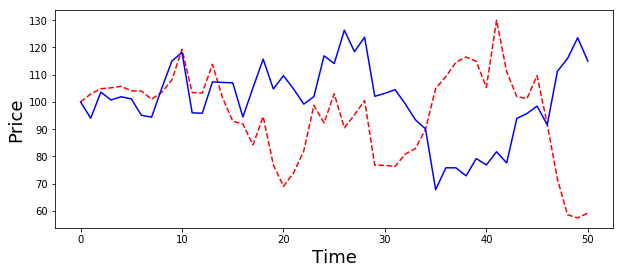

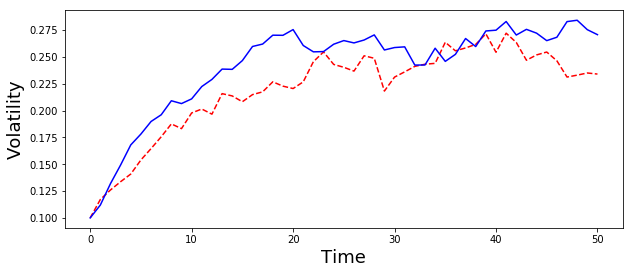

In [63]:
plt.figure(figsize=(10,4))
plt.plot(S[:,0],ls='--', c='r')
plt.plot(S[:,I-1],c='b')
plt.xlabel("Time", fontsize=18)
plt.ylabel("Price", fontsize=18)
           
plt.figure(figsize=(10,4))
plt.plot(v1[:,0],ls='--', c='r')
plt.plot(v1[:,I-1], c='b')
plt.xlabel("Time", fontsize=18)
plt.ylabel("Volatility", fontsize=18)

### The Merton (1976) jump model

Consider the following dynamic of the stock price, both including a Brownian motion and a Poisson jump process with intensity $\lambda$ and mean jump size $\mu_J$:

\begin{equation}
dS_t=\left(r-r_J\right) \times S_t dt+ \sigma \times S_t dZ_t+ J_t S_t dN_t.
\end{equation}


1. $r_J=\lambda\left(\exp\left(\mu_J+\frac{\delta^2}{2}\right)-1\right)$  is a drift correction to maintain the risk-neutral measure.
2. $J_t$ is a jump at date $t$. The distribution of the jump is:
	\begin{equation}
	\log \left(1+J_t\right) \approx \text{Normal}\left(\log\left(1+\mu_J\right)-\frac{\delta^2}{2}, \delta^2\right)
	\end{equation}

** Discretization. ** 

\begin{equation*}
S_t=S_{t-\Delta t}\left(e^{\left(r-r_J-\frac{\sigma^2}{2}\right)\Delta t+\sigma\sqrt{\Delta t}z^1_t}+\left(e^{\mu_J+\delta z^2_t}-1\right)y_t\right)
\end{equation*}	

There are three sources of randomness, and thus we need to generate three sets of numbers:
1. The diffusion part of the stock price (Brownian motion): $z_t^1$.
2. The size of the jump, using normal variable: $z_t^2$.
3. The timing of the jump, using Poisson variable: $y_t$.

Text(0,0.5,'Price')

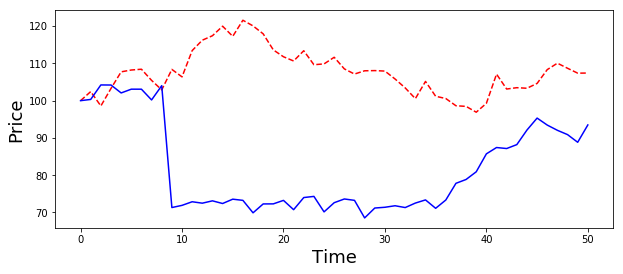

In [68]:
params = (100,0.05,0.2,0.75,-0.6,0.25,1.0,50,10**4)
(S0,r,sigma,lamb,mu,delta,T,M,I) = params

dt = T/M

rj = lamb*(np.exp(mu + 0.5*delta**2) - 1)
S_P = np.zeros((M+1, I))
S_P[0] = S0

z1 = npr.standard_normal((M+1,I))
z2 = npr.standard_normal((M+1,I))
y = npr.poisson(lamb*dt, (M+1,I))

for t in range(1,M+1):
    S_P[t]=S_P[t-1]*(np.exp((r-rj-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*z1[t])
                     +(np.exp(mu+delta*z2[t])-1)*y[t])
    S_P[t]=np.maximum(S_P[t],0)

plt.figure(figsize=(10,4))
plt.plot(S_P[:,0],ls='--', c='r')
plt.plot(S_P[:,I-1],c='b')
plt.xlabel("Time", fontsize=18)
plt.ylabel("Price", fontsize=18)

## Variance reduction

In [69]:
X = npr.randn(100)
X.mean(), X.std()

(0.021224676071524215, 1.0968472811580763)

In [70]:
# Mean adjustment
X1 = X-X.mean()
X1.mean(), X1.std()

(4.440892098500626e-18, 1.0968472811580763)

In [71]:
# Variance adjustment
X2 = X1/X1.std()
X2.mean(), X2.std()

(-2.220446049250313e-18, 1.0)

## Value-at-Risk (VaR)

In [72]:
S[0], S[-1] # initial and final prices of the stock (GBM)

(array([100., 100., 100., ..., 100., 100., 100.]),
 array([ 59.2102731 , 325.14800131,  74.90808594, ..., 127.71720353,
         41.10311063, 114.98878355]))

In [73]:
# Value at risk
var=0.99 # level of value at risk
R_GM=(S[-1]/S[0]-1)*100 # returns for each stock path
var_value=np.percentile(R_GM, 100*(1-var))
var_value

-75.10705027045066

Text(0.5,0,'Return')

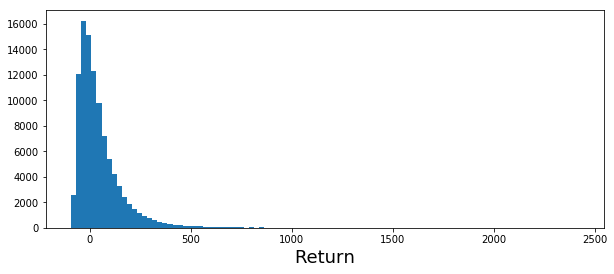

In [78]:
plt.figure(figsize=(10,4))
plt.hist(R_GM,bins=100)
plt.xlabel("Return", fontsize=18)

In [74]:
# Expected shortfall
ES=R_GM[R_GM < np.percentile(R_GM, 100*(1-var))].mean()
ES

-79.56804762977167